## Loading pakages

In [2]:
import requests
import numpy as np
import os
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import matplotlib.pyplot as plt
plt.rc("font", size = 14)
%matplotlib inline
from matplotlib import cm as cm

import seaborn as sns
#for interactive graph
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings('ignore')


## Gathering Data

In [3]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv', encoding='utf-8')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
archive_df.shape

(2356, 17)

In [5]:
archive_df.tweet_id.duplicated().sum()

0

In [6]:
#Downloading 'image-predictions.tsv'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [7]:
os.listdir(folder_name)

['image-predictions.tsv']

In [8]:
#Reading image-predictions.tsv
image_predictions_df = pd.read_csv(folder_name + '/image-predictions.tsv', sep='\t')
image_predictions_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [9]:
#Checking for duplicate tweets
image_predictions_df.tweet_id.duplicated().sum()

0

* I am not supposed to share the key and secret details.

In [10]:
#Creating an API object that can be used to gather Twitter data.
import tweepy

consumer_key = 'CONSUMER KEY'
consumer_secret = 'CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [11]:
api

In [12]:
archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [13]:
tweet_ids = list(archive_df.tweet_id)
tweet_data = {}
fails_dict= {}
start = timer()
for tweet_id in tweet_ids:
    try:
        tweet_status = api.get_status(tweet_id, tweet_mode='extended')
        tweet_data[str(tweet_id)] = tweet_status._json
    except tweepy.TweepError as e:
        print("Error for:" +str(tweet_id))
        fails_dict[str(tweet_id)] = e
        
end = timer()
print(end - start)
print(fails_dict)

Error for:888202515573088257
Error for:873697596434513921
Error for:872668790621863937
Error for:872261713294495745
Error for:869988702071779329
Error for:866816280283807744
Error for:861769973181624320
Error for:856602993587888130
Error for:851953902622658560
Error for:845459076796616705
Error for:844704788403113984
Error for:842892208864923648
Error for:837366284874571778
Error for:837012587749474308
Error for:829374341691346946
Error for:827228250799742977
Error for:812747805718642688
Error for:802247111496568832
Rate limit reached. Sleeping for: 537
Error for:779123168116150273
Error for:775096608509886464
Error for:770743923962707968
Error for:754011816964026368
Rate limit reached. Sleeping for: 724
Error for:680055455951884288
1728.949946924
{'888202515573088257': TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), '873697596434513921': TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), '872668790621863937': TweepError([{'code': 144, '

In [14]:
print("Length : %d"% len(fails_dict))

Length : 23


* 23 tweet ids are not present in the twitter website.

In [15]:
#Writing the data into text fie
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [16]:
#Reading the text file in json format
with open('tweet_json.txt') as file:
    data =json.load(file)
    
tweets_info_list = []
for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favourites = data[tweet_id]['favorite_count']
    followers = data[tweet_id]['user']['followers_count']
    friends = data[tweet_id]['user']['friends_count']
    tweets_info_list.append({'tweet_id': tweet_id, 'retweets': retweets,
                            'favorites': favourites,
                            'followers': followers,
                            'friends': friends})
tweets_info_df = pd.DataFrame(tweets_info_list, columns = ['tweet_id', 'retweets', 'favorites', 'followers', 'friends'])
tweets_info_df.sample(5)

,tweet_id,retweets,favorites,followers,friends
826,766078092750233600,2706,0,8586686,14
1234,710588934686908417,1894,4600,8586689,14
629,793135492858580992,2590,6699,8586685,14
456,816450570814898180,8418,31547,8586713,14
130,866334964761202691,13631,50769,8586715,14


In [17]:
tweets_info_df.tweet_id.duplicated().sum()

0

For some of the tweets, thereare no favorites count information.

## Summary of Gathered Data:

   * archive_df - This is a dataset "twitter-archive-enhanced.csv" which was converted into a dataframe and this gives
     information about the basic tweet data.
   * tweets_info_df - This dataset contains information such as tweet_id, no.o retweets and no.of faviorites etc.
   * image_predictions_df - This dataset contains information about predictions about the image.   

# Visual Assessment of Data:   

This twitter datset comes in three tables. We need to acquaint ourself with them through 
visual assessment as below.

## Assessing the data

Each column of the table in twitter dataset is described in the cells below. To see the table 
columns that goes hand in hand with these descriptions, I displayed each table by displaying 
the pandas DataFrame that it was gathered into.This task is the mechincal part of 
visual assessment in pandas.

In [19]:
#archive_df table
archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [24]:
archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

**Enhanced Twitter Archive**: The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets,I have filtered for tweets with ratings only (there are 2356).

### archive_df columns and their description:

* **tweet_id**: The unique identifier  for each of the tweet.
* **in_reply_to_status_id**: The status id for the reply given to the tweet id.
* **in_reply_to_user_id**: The status of id for the reply given to the tweet id w.r.t user id.
* **timestamp**: Date and time the tweet was created, in Excel-friendly format.
* **source**: The web link as source.
* **text**: The corresponding tweets text.
* **retweeted_status_id**: The status id for the reply given to the tweer id i.e., for the retweet id
* **retweeted_status_user_id**: The status id for the reply given to the tweer id(w.r.t user id) i.e., for the retweet id
* **retweeted_status_timestamp**: Date and time the tweet was created, in Excel-friendly format.
* **expanded_urls**: Expanded version of url1; URL entered by user and displayed in Twitter. Note that the user-entered URL
    may itself be a shortened URL, e.g. from bit.ly.
* **rating_numerator**: The ranking given by user.
* **rating_denominator**: The reference ranking given by user.
* **name**: The breed or dog's name.
* **doggo,floofer,pupper,puppo** : The stage of the dog.

The link to the twitter columns: https://sfm.readthedocs.io/en/1.4.3/data_dictionary.html

In [25]:
#Descriptive statistics of archive_df table
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [26]:
#Data types of archive_df table
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [27]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [28]:
#Checking for any duplicates
archive_df[archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [29]:
archive_df[archive_df['name'] == 'officially']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1747,679111216690831360,NaN,NaN,2015-12-22 01:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is officially the greatest yawn of all ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679111216...,12,10,officially,None,None,None,None


In [30]:
#Checking the rating values for numerator
archive_df['rating_numerator'].value_counts().sort_values()

20        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
26        1
182       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
143       1
24        1
204       1
80        1
121       1
75        2
15        2
0         2
420       2
2         9
1         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

In [31]:
#Checking for the rating values for denominator
archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [32]:
#Identifying the rating with 0
archive_df[archive_df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [33]:
#checking the dog names
dog_names_list = []
dog_names_list = archive_df['name'].unique()
dog_names_list.sort()
dog_names_list

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu',

In [34]:
#checking for complete text
text = archive_df['text'][320]
text

'Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe'

### Quality - archive_df

### archive_df table

1. Missing values in columns from in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,
   retweeted_status_timestamp, expanded_urls.
2. rating_numerator, rating_denominator have some inconsistent values in the numerator and denominator (some of them showing as    hish as 1776, 170 respectively.
3. tweet id  8352464395298040 as a rating of denominator = 0
4. Crazy names found for few dogs such as - 'infuriating', 'just', 'light', 'life', 'mad', 'my', 'not', 'officially',              'one','quite','old','space','such','the','this','unacceptable','very'.
5. timestamp and retweeted_status_timestamp must be of datetime instead of the object.
6. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id must be integers instead of float      (Their id's are similar to tweet_id).
7. The columns which have missing values in doggo, floofer, pupper, puppo - has **None** instead of 'NaN'.
8. The information of text is truncated to 50 characters. Anything in excess is ellipsized.

### Tidiness - archive_df

* This archive_df is like a main base table with the above attributes, there are some other attributes that are found to 
  be there in other dataframes. Hence we need to join all other dataframes to get a final dataframe.
* Dog stages are found in multiple columns, hence we should find a way to club all these variables into a single column. 
  This will reduce the dimensionality of the dataframe.

In [35]:
#Displaying tweets_info_df table
tweets_info_df.head(5)

,tweet_id,retweets,favorites,followers,friends
0,892420643555336193,7848,36816,8586714,14
1,892177421306343426,5813,31696,8586714,14
2,891815181378084864,3847,23881,8586714,14
3,891689557279858688,8013,40151,8586714,14
4,891327558926688256,8659,38336,8586714,14


In [36]:
#Displaying tweets_info_df columns
tweets_info_df.columns

Index(['tweet_id', 'retweets', 'favorites', 'followers', 'friends'], dtype='object')

In [37]:
#Checking the descriptive statistics
tweets_info_df.describe()

,retweets,favorites,followers,friends
count,2333.000000,2333.000000,2.333000e+03,2333.0
mean,2763.778826,7681.843549,8.586710e+06,14.0
std,4677.215657,11923.233060,6.344353e+01,0.0
min,1.000000,0.000000,8.586685e+06,14.0
25%,555.000000,1335.000000,8.586688e+06,14.0
50%,1295.000000,3342.000000,8.586713e+06,14.0
75%,3214.000000,9438.000000,8.586715e+06,14.0
max,79375.000000,159083.000000,8.587372e+06,14.0


In [38]:
#checking the datatypes
tweets_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 5 columns):
tweet_id     2333 non-null object
retweets     2333 non-null int64
favorites    2333 non-null int64
followers    2333 non-null int64
friends      2333 non-null int64
dtypes: int64(4), object(1)
memory usage: 91.2+ KB


In [39]:
#Checking for missing values
tweets_info_df.isnull().sum()

tweet_id     0
retweets     0
favorites    0
followers    0
friends      0
dtype: int64

In [40]:
#checking for duplicates
tweets_info_df[tweets_info_df.tweet_id.duplicated()]

,tweet_id,retweets,favorites,followers,friends


### Quality - tweets_info_df

**tweets_info_df table**: 23 tweet ids information is missing.

**Tidiness-tweets_info_df:** Retweets and Favorities has to be joined to archive_df table, because all the tweets information is found in archive_df table.

In [41]:
#Displaying image_predictions_df table
image_predictions_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [42]:
image_predictions_df.shape

(2075, 12)

In [43]:
#displaying image_predictions columns
image_predictions_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Quality - image_predictions_df dataset:

WeRateDogs Twitter archive was ran through a neural network that can classify breeds of dogs. The results - a table full of 
image predictions(the top three only) alongside each tweetID, image  URL, and the image number that corresponded to the most
confident prediction (numbered 1 to 4 since tweets can have up to four images).

image_predictions_df columns and their description:

* **tweet_id**: tweet_id is the last part of the tweet URL after "status/".
* **jpg_url**: Image link or URL.
* **img_num**: Image number.
* **p1**: p1 algorithm's #1 prediction for the image in the tweet.
* **p1_conf**: p1_conf is how confident the algoritm is in its #1 prediction.
* **p1_dog**: p1_dog is whether or not the #1 prediction is a breed of dog.
* **p2**: is the algorithm's second most likely prediction.
* **p2_conf**: is how confident the algoritm is in its #2 prediction.
* **p2_dog**: p2_dog is whether or not the #2 prediction is a breed of dog.
* **p3**: is the algorithm's third most likely prediction.
* **p3_conf**: is how confident the algoritm is in its #3 prediction.
* **p3_dog**: p3_dog is whether or not the #3 prediction is a breed of dog.

In [44]:
#Checking for duplicates
image_predictions_df[image_predictions_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [45]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [46]:
#Checking for null values
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Quality - image_predictions_df dataset

**image_predictions_df**: only 2075 tweetids have images.

### Tidiness - image_predictions_df

All the prediction output from different algrithms needs to be joined with archive_df, because all the tweets information
is found in the archive_df table.

## Cleaning Data for this Project

### Define

Create the copy of all the dataframes

### Code

In [47]:
tweets_info_df.dtypes

tweet_id     object
retweets      int64
favorites     int64
followers     int64
friends       int64
dtype: object

In [48]:
archive_clean =  archive_df.copy()
tweets_clean = tweets_info_df.copy()
image_prediction_clean = image_predictions_df.copy()

In [49]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [50]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 5 columns):
tweet_id     2333 non-null object
retweets     2333 non-null int64
favorites    2333 non-null int64
followers    2333 non-null int64
friends      2333 non-null int64
dtypes: int64(4), object(1)
memory usage: 91.2+ KB


In [51]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Define

Convert the datatype of 'tweet_id' into string.

#### Code

In [52]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
image_prediction_clean['tweet_id'] = image_prediction_clean['tweet_id'].astype(str)

#### Test

In [53]:
archive_clean.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [54]:
image_prediction_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Tidiness

#### Define

Create a universe dataset joining all the dataframes based on the tweet_id.

#### Code

In [55]:
archive_clean = pd.merge(archive_clean, tweets_clean, how = 'inner', on ='tweet_id')
archive_clean = pd.merge(archive_clean, image_prediction_clean, how = 'inner', on = 'tweet_id')

#### Test

In [56]:
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1131,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,...,1,hippopotamus,0.581403,False,doormat,0.152445,False,sea_lion,0.026364,False
1464,679527802031484928,NaN,NaN,2015-12-23 05:03:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This little pupper just arrived. 11/10 would s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679527802...,...,1,mailbox,0.336393,False,cannon,0.158936,False,cuirass,0.052647,False
679,765669560888528897,NaN,NaN,2016-08-16 22:00:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tove. She's a Balsamic Poinsetter. Sur...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765669560...,...,1,beagle,0.993333,True,Walker_hound,0.002902,True,basset,0.002415,True
1182,698549713696649216,NaN,NaN,2016-02-13 16:50:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Claude. He's trying to be seductive bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698549713...,...,1,French_bulldog,0.998544,True,Boston_bull,0.001404,True,boxer,0.000023,True
650,770787852854652928,NaN,NaN,2016-08-31 00:58:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His tongue has gone rogue. Do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770787852...,...,1,Bernese_mountain_dog,0.787812,True,Greater_Swiss_Mountain_dog,0.163946,True,EntleBucher,0.020293,True


In [57]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 32 columns):
tweet_id                      2061 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2061 non-null object
source                        2061 non-null object
text                          2061 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2061 non-null object
rating_numerator              2061 non-null int64
rating_denominator            2061 non-null int64
name                          2061 non-null object
doggo                         2061 non-null object
floofer                       2061 non-null object
pupper                        2061 non-null object
puppo                         2061 non-null object
retweets                      2061

In [58]:
archive_clean.shape

(2061, 32)

### Tidiness

#### Define

Convert the dog stage or category into one column instead of the multiple columns.

#### Code

In [59]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [60]:
archive_clean.shape

(2061, 32)

In [61]:
archive_clean = pd.melt(archive_clean,
                       id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
                               'timestamp','source','text','retweeted_status_id',
                                'retweeted_status_user_id', 'retweeted_status_timestamp',
                                'expanded_urls','rating_numerator','rating_denominator','name',
                               'retweets','favorites','followers','friends','jpg_url',
                                'img_num','p1', 'p1_conf', 'p1_dog',
                                'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
                        value_name = 'dog_stage')

In [62]:
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,variable,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,doggo,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,doggo,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,doggo,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,doggo,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,doggo,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,doggo,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo,doggo


In [63]:
archive_clean.drop(['variable'], axis=1,inplace = True)

In [64]:
archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None


In [65]:
archive_clean = archive_clean.drop_duplicates()

In [66]:
archive_clean.shape

(2393, 29)

In [67]:
archive_clean.tweet_id.duplicated().sum()

332

**Still there are duplicated rows(332) becuase the count has increased from 2393 to 2061. These duplicated 
rows might have occured due to multiple tagging done with dog_status. Now lets clean the rows with only one dog_status column
value.**

In [68]:
archive_clean.dog_stage.value_counts()

None       2061
pupper      222
doggo        78
puppo        24
floofer       8
Name: dog_stage, dtype: int64

In [69]:
#Identifying the duplicate rows at tweet_id and dog_stage combination
duplicate_tweet_dog_stage = archive_clean.drop_duplicates(subset=['tweet_id','dog_stage'])
duplicate_tweet_dog_stage.shape

(2393, 29)

In [70]:
#Selecting the rows with dog_stage with out "None"
duplicate_tweet_dog_stage_1 = duplicate_tweet_dog_stage[duplicate_tweet_dog_stage['dog_stage'] !='None']
duplicate_tweet_dog_stage_1.shape

(332, 29)

In [71]:
duplicate_tweet_dog_stage_1['tweet_id'].value_counts().head(5)

808106460588765185    2
741067306818797568    2
770093767776997377    2
802265048156610565    2
817777686764523521    2
Name: tweet_id, dtype: int64

In [72]:
#Checking the multiple rows information with different dog_stage
duplicate_tweet_dog_stage_1[duplicate_tweet_dog_stage_1['tweet_id'] == '817777686764523521']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
357,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,doggo
4479,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,pupper


In [73]:
#checking the mupltiple rows information with different dog_stage and its text
duplicate_tweet_dog_stage_1[duplicate_tweet_dog_stage_1['tweet_id'] == '817777686764523521']['text']

357     This is Dido. She's playing the lead role in "...
4479    This is Dido. She's playing the lead role in "...
Name: text, dtype: object

In [74]:
#Making bool series
bool_series = duplicate_tweet_dog_stage_1['tweet_id'].duplicated(keep = False)

#bool series
bool_series

#Passing NOT of bool series to see unique values only
duplicate_tweet_dog_stage_1 = duplicate_tweet_dog_stage_1[~bool_series]

In [75]:
duplicate_tweet_dog_stage_1.shape

(306, 29)

In [76]:
duplicate_tweet_dog_stage_1.tweet_id.duplicated().sum()

0

In [77]:
#Keeping the random row which has dog_stage other than None, it can be any of the dog_stage
# (Even with the valid dog_stage there are duplicates init)
duplicate_tweet_dog_stage_2 = duplicate_tweet_dog_stage_1.drop_duplicates(subset=['tweet_id'])

In [78]:
duplicate_tweet_dog_stage_2.shape

(306, 29)

In [79]:
#Combining
duplicate_df1 = duplicate_tweet_dog_stage.drop_duplicates(subset = 'tweet_id', keep = False)
duplicate_df_merged = duplicate_df1.append(duplicate_tweet_dog_stage_2)
duplicate_df_merged.shape

(2048, 29)

#### Test

In [80]:
duplicate_df_merged.tweet_id.duplicated().sum()

0

In [81]:
duplicate_df_merged.dog_stage.value_counts()

None       1742
pupper      211
doggo        65
puppo        23
floofer       7
Name: dog_stage, dtype: int64

In [82]:
duplicate_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 7061
Data columns (total 29 columns):
tweet_id                      2048 non-null object
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     2048 non-null object
source                        2048 non-null object
text                          2048 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2048 non-null object
rating_numerator              2048 non-null int64
rating_denominator            2048 non-null int64
name                          2048 non-null object
retweets                      2048 non-null int64
favorites                     2048 non-null int64
followers                     2048 non-null int64
friends                       2048 non-null int64
jpg_url                       2048 non

In [83]:
archive_clean = duplicate_df_merged.copy()

#### Define

in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id - covert all these datatypes into 
Object or String. 

#### Code

In [84]:
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.astype(str)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.astype(str)
archive_clean.retweeted_status_id = archive_clean.retweeted_status_id.astype(str)
archive_clean.retweeted_status_user_id = archive_clean.retweeted_status_user_id.astype(str)

#### Test

In [85]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 7061
Data columns (total 29 columns):
tweet_id                      2048 non-null object
in_reply_to_status_id         2048 non-null object
in_reply_to_user_id           2048 non-null object
timestamp                     2048 non-null object
source                        2048 non-null object
text                          2048 non-null object
retweeted_status_id           2048 non-null object
retweeted_status_user_id      2048 non-null object
retweeted_status_timestamp    72 non-null object
expanded_urls                 2048 non-null object
rating_numerator              2048 non-null int64
rating_denominator            2048 non-null int64
name                          2048 non-null object
retweets                      2048 non-null int64
favorites                     2048 non-null int64
followers                     2048 non-null int64
friends                       2048 non-null int64
jpg_url                       2048

#### Define

retweeted_status_timestamp - Covert this variable datatype into datetime format

#### Code

In [86]:
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.retweeted_status_timestamp)
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### Test

In [87]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 7061
Data columns (total 29 columns):
tweet_id                      2048 non-null object
in_reply_to_status_id         2048 non-null object
in_reply_to_user_id           2048 non-null object
timestamp                     2048 non-null datetime64[ns]
source                        2048 non-null object
text                          2048 non-null object
retweeted_status_id           2048 non-null object
retweeted_status_user_id      2048 non-null object
retweeted_status_timestamp    72 non-null datetime64[ns]
expanded_urls                 2048 non-null object
rating_numerator              2048 non-null int64
rating_denominator            2048 non-null int64
name                          2048 non-null object
retweets                      2048 non-null int64
favorites                     2048 non-null int64
followers                     2048 non-null int64
friends                       2048 non-null int64
jpg_url           

#### Define

We see that the information of text is truncated to 50 characters. Anything in excess is ellipsized. So lets increase 
the text representation.

#### Code

In [88]:
pd.set_option('display.max_colwidth', -1)

#### Test

In [89]:
archive_clean.text[archive_clean.name == 'infuriating']

1039    We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2
Name: text, dtype: object

In [90]:
archive_clean.text[archive_clean.name == 'just']

1729    This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP 
5338    This is just a beautiful pupper good shit evolution. 12/10 https://t.co/2L8pI0Z2Ib
Name: text, dtype: object

In [91]:
archive_clean.text[archive_clean.name == 'life']

Series([], Name: text, dtype: object)

In [92]:
archive_clean.text[archive_clean.name == 'light']

1711    This is light saber pup. Ready to fight off evil with light saber. 10/10 true hero https://t.co/LPPa3btIIt
Name: text, dtype: object

#### Define

*  Irrelevant names found for few dogs such as - 'infuriating', 'just', 'light', 'life', 'mad', 'my', 'not', 'officially',         'one','quite','old','space','such','the','this','unacceptable','very'.
*  Let us clean these names to the ideal once.

#### __Code__

In [93]:
lst = ['infuriating', 'just', 'light', 'life', 'mad', 'my', 'not', 'officially','one','quite','old','space',
       'such','the','this','unacceptable','very','a','an']

for word in lst:
    print(archive_clean.text[archive_clean.name == word])

1039    We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2
Name: text, dtype: object
1729    This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP 
5338    This is just a beautiful pupper good shit evolution. 12/10 https://t.co/2L8pI0Z2Ib
Name: text, dtype: object
1711    This is light saber pup. Ready to fight off evil with light saber. 10/10 true hero https://t.co/LPPa3btIIt
Name: text, dtype: object
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
680    This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB
Name: text, dtype: object
799    What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX
Name: text, dtype: object
1472    This is officially the greatest yawn of all time. 12/10 

The above comments looks like, from the textt we cannot obtain the name of the dog.
So lets replace the values with "No_Name"

In [94]:
for word in lst:
    archive_clean.name[archive_clean.name == word] = 'None'

In [95]:
lst = ['infuriating', 'just', 'light', 'life', 'mad', 'my', 'not', 'officially','one','quite','old','space',
       'such','the','this','unacceptable','very','a','an']
for word in lst:
    print(archive_clean.text[archive_clean.name == word])

Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)


#### Test

In [96]:
archive_clean.name.value_counts()[:10]

None       659
Tucker     10 
Cooper     10 
Charlie    10 
Oliver     10 
Penny      10 
Lucy       9  
Bo         8  
Winston    8  
Lola       8  
Name: name, dtype: int64

#### Define

rating_numerator and rating_denominator have some inconsistent values in the numerator and denominator(some of them showing 
as high as 1776, 170 respectively). In one tweet_id, the rating of denominator is shown as 0. Hence, assuming that the ratings are done purely on a humouros basis. Hence we are seeing the wide range of values. 

In [98]:
archive_clean.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         0   
in_reply_to_user_id           0   
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           0   
retweeted_status_user_id      0   
retweeted_status_timestamp    1976
expanded_urls                 0   
rating_numerator              0   
rating_denominator            0   
name                          0   
retweets                      0   
favorites                     0   
followers                     0   
friends                       0   
jpg_url                       0   
img_num                       0   
p1                            0   
p1_conf                       0   
p1_dog                        0   
p2                            0   
p2_conf                       0   
p2_dog                        0   
p3                            0   
p3_conf                       0   
p3_dog                        0   
dog_stage           

retweeted_status_timestamp - column has the null values

#### Code

As close to 1976 tweets have the null values, and the importance of this variable is minimul as far as the analysis is 
considered. Hence I am considering to remove this variable.

In [99]:
archive_clean.drop(['retweeted_status_timestamp'],axis=1, inplace = True)

In [100]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 7061
Data columns (total 28 columns):
tweet_id                    2048 non-null object
in_reply_to_status_id       2048 non-null object
in_reply_to_user_id         2048 non-null object
timestamp                   2048 non-null datetime64[ns]
source                      2048 non-null object
text                        2048 non-null object
retweeted_status_id         2048 non-null object
retweeted_status_user_id    2048 non-null object
expanded_urls               2048 non-null object
rating_numerator            2048 non-null int64
rating_denominator          2048 non-null int64
name                        2048 non-null object
retweets                    2048 non-null int64
favorites                   2048 non-null int64
followers                   2048 non-null int64
friends                     2048 non-null int64
jpg_url                     2048 non-null object
img_num                     2048 non-null int64
p1        

### Storing, Analyzing and Visualizing Data

#### Storing Data

In [101]:
archive_clean.to_csv('twitter_archive_master.csv', encoding ='utf-8', index = False)

#### Analyzing and Visualization

In [102]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'dog_stage'],
      dtype='object')

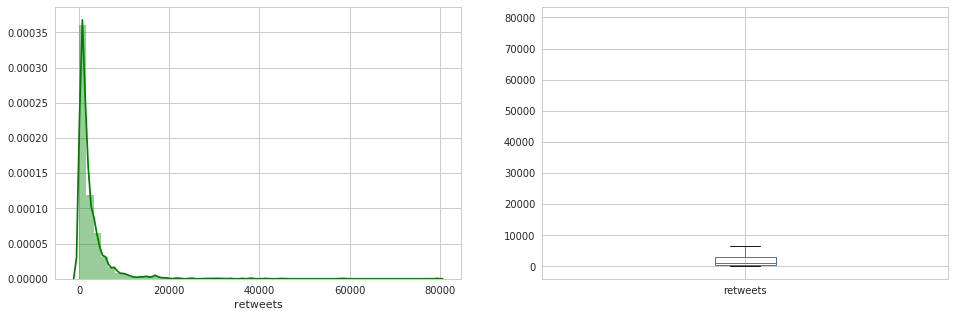

In [104]:
#Creating plots for analyszing data
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['retweets'], color = 'green')

#creating box plot of retweets
plt.subplot(122)
archive_clean['retweets'].plot.box(figsize=(16,5))

plt.show()

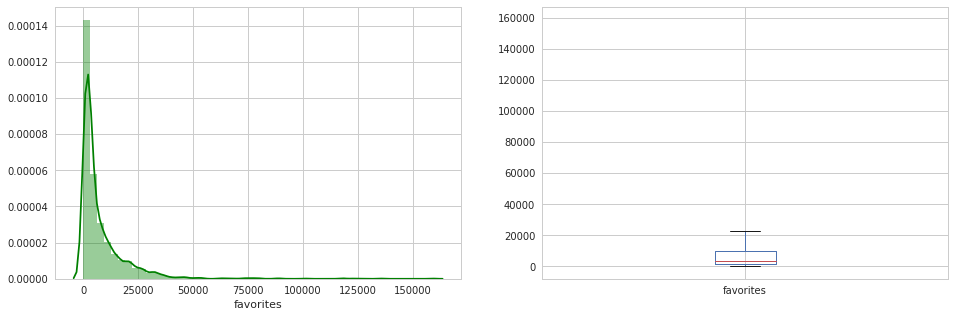

In [105]:
#Creating plots for analyszing data
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['favorites'], color = 'green')

#creating box plot of favorites
plt.subplot(122)
archive_clean['favorites'].plot.box(figsize=(16,5))

plt.show()

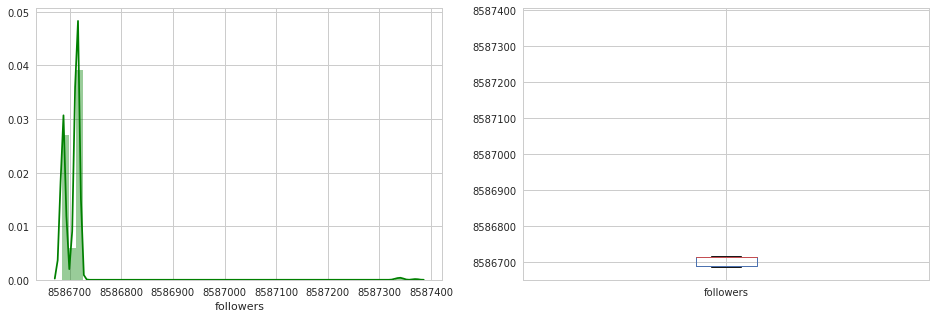

In [106]:
#Creating plots for analyszing data
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['followers'], color = 'green')

#creating box plot of followers
plt.subplot(122)
archive_clean['followers'].plot.box(figsize=(16,5))

plt.show()

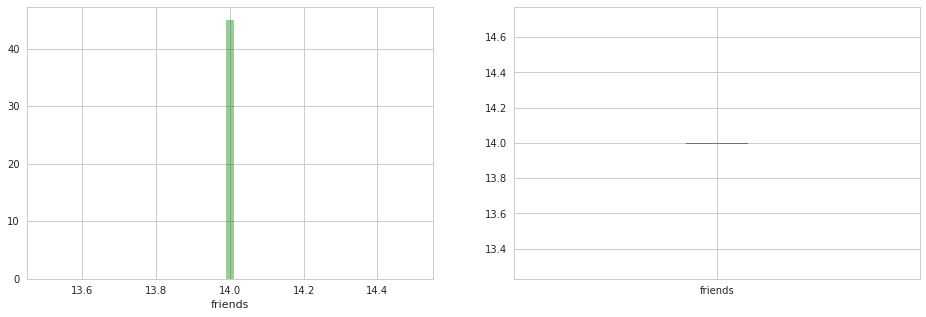

In [107]:
#Creating plots for analyszing data
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['friends'], color = 'green')

#creating box plot of friends
plt.subplot(122)
archive_clean['friends'].plot.box(figsize=(16,5))

plt.show()

Lets do a log transformation for retweets, favorites and followers only so that we can normatize the data.

In [108]:
#Just capping the values to 1for whichever values <=0
archive_clean['favorites_mod'] = archive_clean.favorites[archive_clean.favorites <= 0] = 1
archive_clean['retweets_mod'] = archive_clean.retweets[archive_clean.retweets <= 0] = 1

In [109]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'dog_stage', 'favorites_mod', 'retweets_mod'],
      dtype='object')

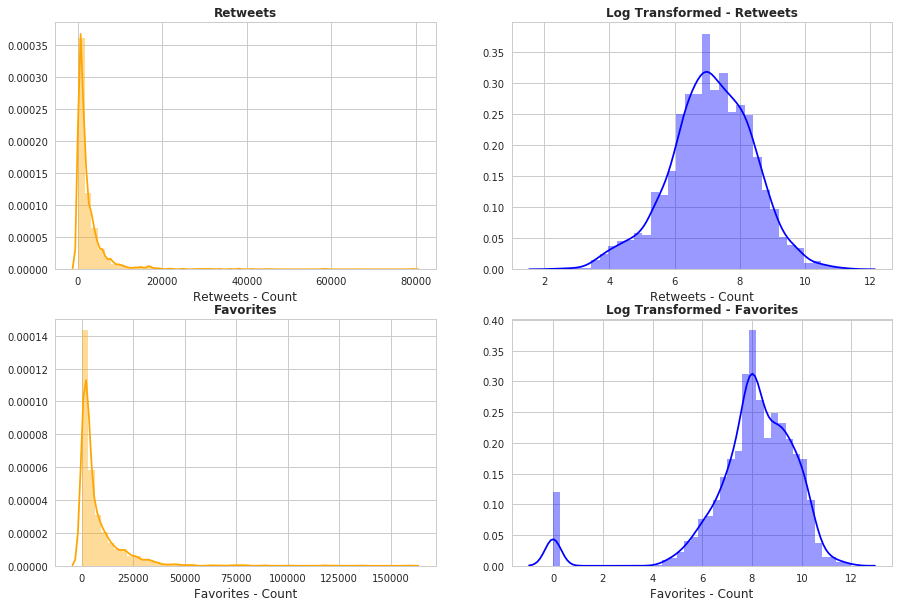

In [151]:
#Creating plots for analyszing data
plt.figure(1)
plt.figure(figsize = (15,10))
plt.subplot(221)
sns.distplot(archive_clean.retweets, color = 'orange')
plt.title('Retweets', fontweight="bold", fontsize= 12.0)
plt.xlabel('Retweets - Count', fontsize=12)

#creating box plot of friends
plt.subplot(222)
sns.distplot(archive_clean.retweets.apply(np.log), color = 'blue')
plt.title('Log Transformed - Retweets', fontweight="bold", fontsize= 12.0)
plt.xlabel('Retweets - Count', fontsize=12)

plt.subplot(223)
sns.distplot(archive_clean.favorites, color = 'orange')
plt.title('Favorites', fontweight="bold", fontsize= 12.0)
plt.xlabel('Favorites - Count', fontsize=12)

#creating box plot of friends
plt.subplot(224)
sns.distplot(archive_clean.favorites.apply(np.log), color = 'blue')
plt.title('Log Transformed - Favorites', fontweight="bold", fontsize= 12.0)
plt.xlabel('Favorites - Count', fontsize=12)


plt.savefig('RetweetsVSFavorites.png')

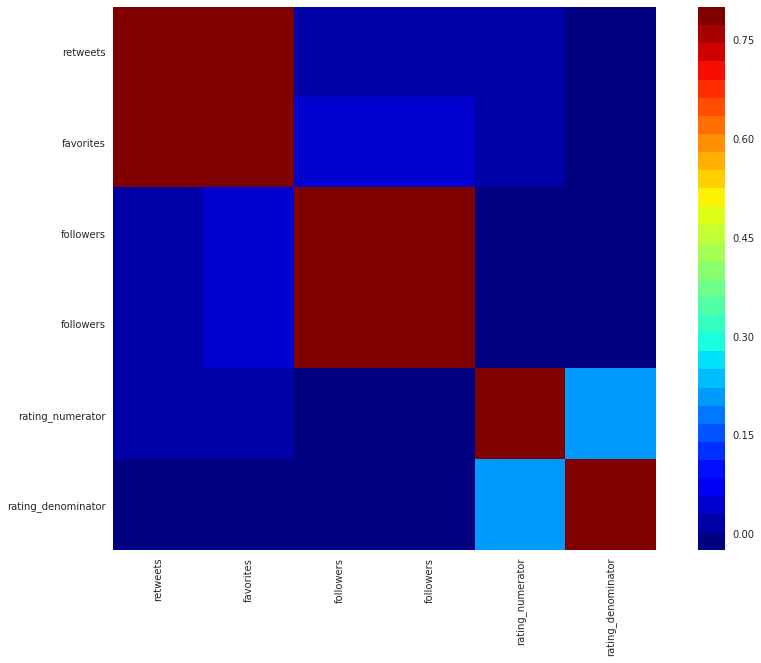

In [166]:
#Correlation between numerical variables
num_cols_data = (archive_clean[['retweets', 'favorites', 'followers','followers','rating_numerator','rating_denominator']])
matrix = num_cols_data.corr()
f, ax = plt.subplots(figsize=(15,10))
cml = cm.get_cmap('jet', 30)
sns.heatmap(matrix, vmax=0.8, square=True, cmap=cml);
plt.savefig('corr_plot.png')

It looks like Retweets and Favorites are highly correlated. This shows that people who have retweeted have also done with
favorites tag. Hence both the distributions shows similar behaviour.

To confirm the above behaviour, let's plot a scatter plot between Retweet and Favorites.

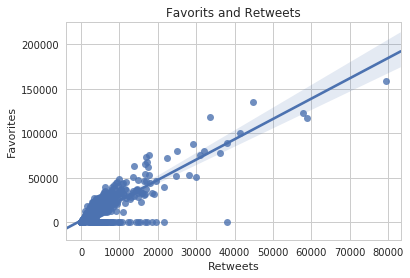

In [152]:
graph = sns.regplot(x=archive_clean.retweets, y=archive_clean.favorites)
plt.title("Favorits and Retweets")
plt.xlabel("Retweets")
plt.ylabel("Favorites")


plt.savefig('scatterplot.png')

The above scatter plot shows that both the Retweets and Favorites go in sync together.

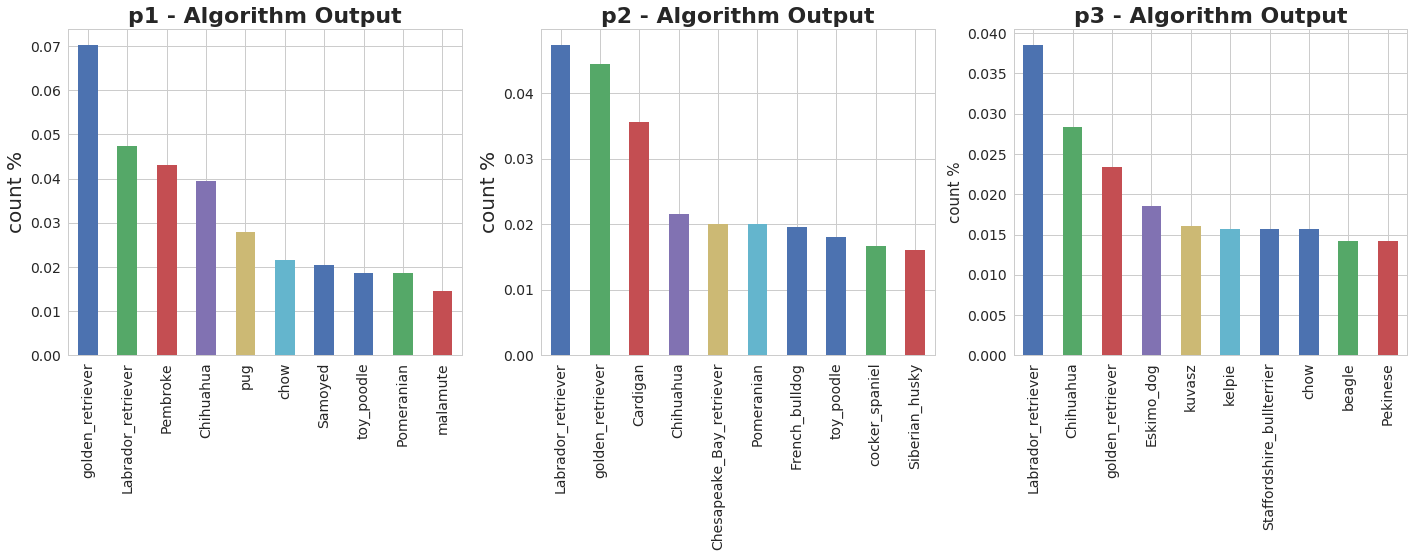

In [163]:
plt.figure(1)
plt.subplot(131)

archive_clean['p1'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize=14.0)
plt.title('p1 - Algorithm Output',fontweight="bold", fontsize=22.0)
plt.ylabel('count %', fontsize = 20.0)

plt.subplot(132)
archive_clean['p2'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize=14.0)
plt.title('p2 - Algorithm Output',fontweight="bold", fontsize=22.0)
plt.ylabel('count %', fontsize = 20.0)

plt.subplot(133)
archive_clean['p3'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize=14.0)
plt.title('p3 - Algorithm Output',fontweight="bold", fontsize=22.0)
plt.ylabel('count %', fontsize = 15.0)

plt.savefig('Output_Predictions.png')

Majority of the predictions by 3 algoritms is done by golden_retriever, Labor_retriever and Chihuahua dogs.

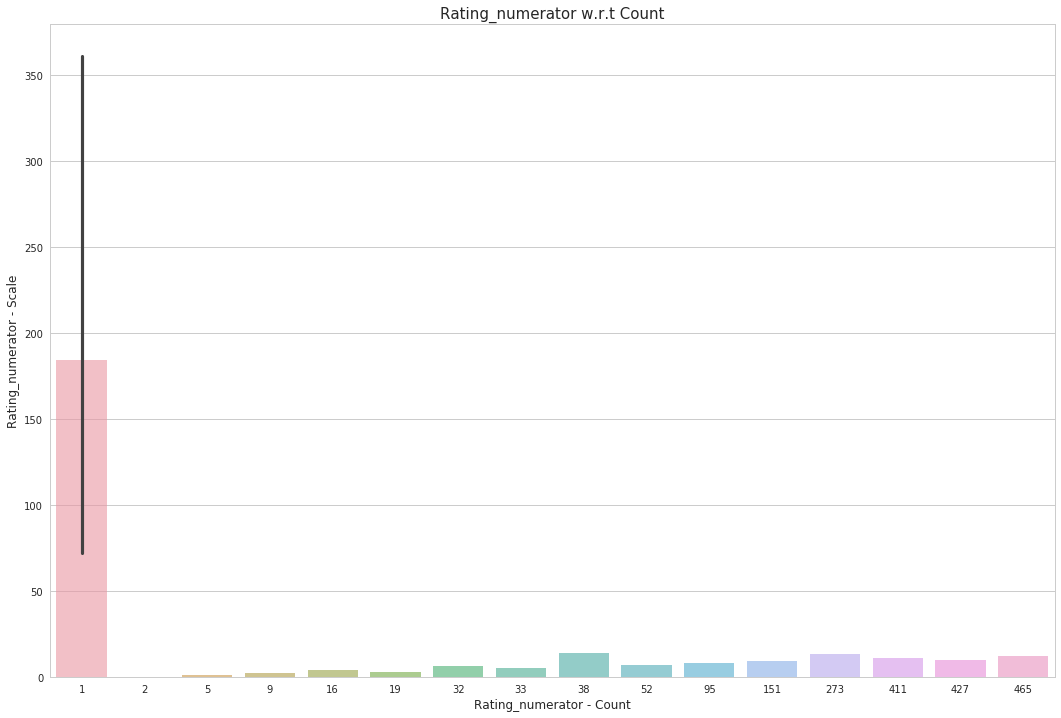

In [156]:
#Top rating numerator values based on the count
cnt_srs = archive_clean['rating_numerator'].value_counts().head(40)
plt.figure(figsize=(18,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.6)
plt.xlabel('Rating_numerator - Count', fontsize=12)
plt.ylabel('Rating_numerator - Scale', fontsize=12)
plt.title("Rating_numerator w.r.t Count", fontsize=15)
#plt.show()
plt.savefig('Rating_Numerator.png')

Rating numerator have majority of ratings around 10. Except one rating around 170.

In [134]:
archive_clean[archive_clean['rating_denominator'] < 10].shape

(2, 30)

In [135]:
archive_clean[archive_clean['rating_denominator']> 10].shape

(16, 30)

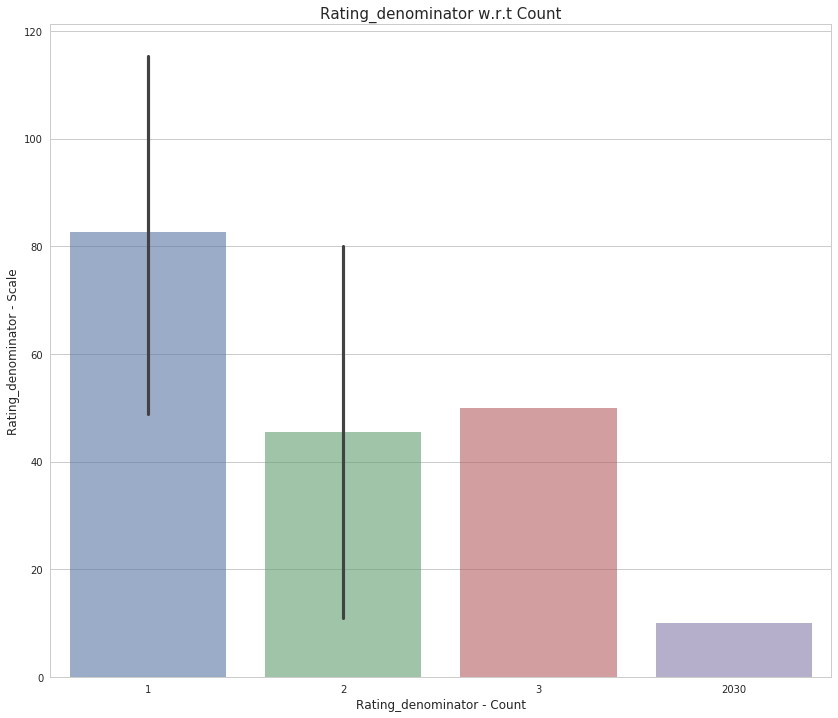

In [158]:
#Top rating_denominator based on the count
cnt_srs = archive_clean['rating_denominator'].value_counts().head(40)
plt.figure(figsize=(14,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.6)
plt.xlabel('Rating_denominator - Count', fontsize=12)
plt.ylabel('Rating_denominator - Scale', fontsize=12)
plt.title("Rating_denominator w.r.t Count", fontsize=15)

plt.savefig('Rating_Denominator.png')

> Normally there must be rating denominator with only 10,but sometimes users with exaggeration(may be) rated with < 10 and > 10
> So overall we have 16 records with the above scenario and all other tweets are rated on 10.
> 2030 tweets have rating 10

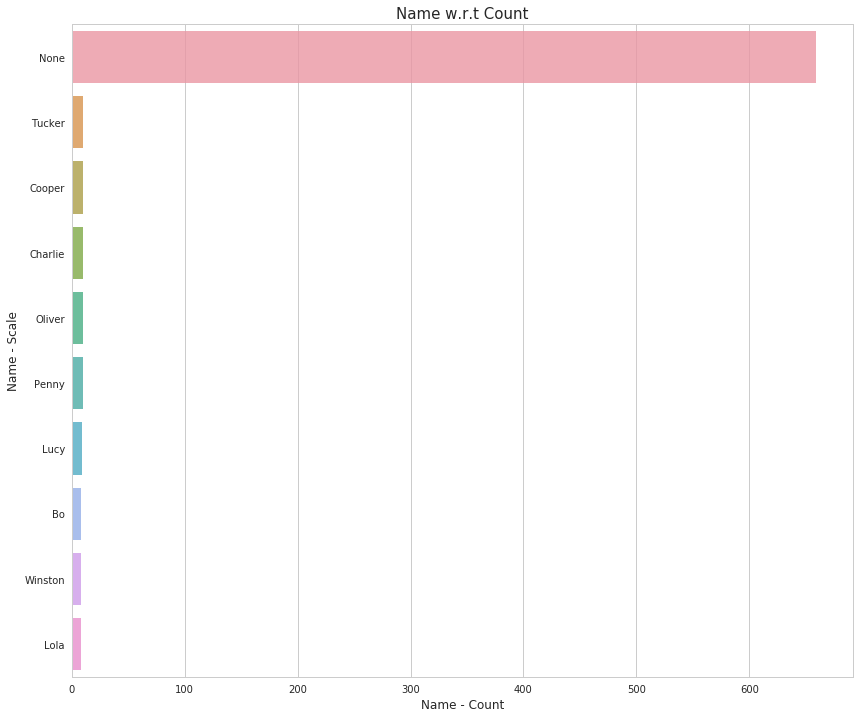

In [160]:
#Top dog name values based on the count
cnt_srs = archive_clean['name'].value_counts().head(10)
plt.figure(figsize=(14,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Name - Count', fontsize=12)
plt.ylabel('Name - Scale', fontsize=12)
plt.title("Name w.r.t Count", fontsize=15)
plt.savefig('Dog_Name-Count.png')

Based on the above plot majority of the Dog Names are "None".

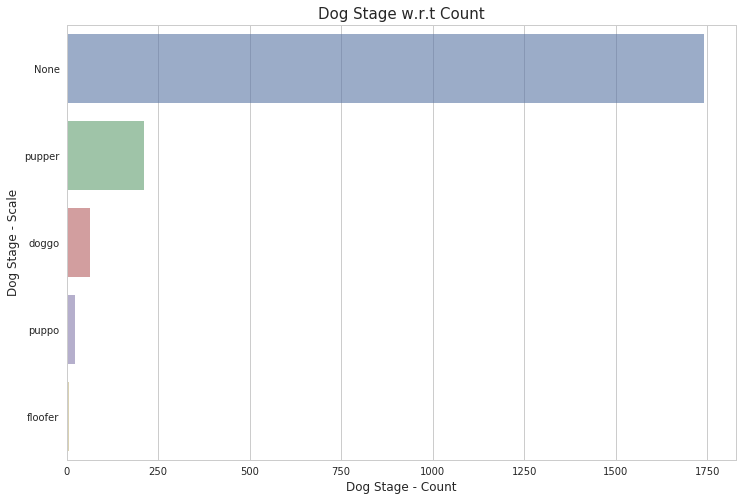

In [161]:
#Top Dog_stage values with respect to count
cnt_srs = archive_clean['dog_stage'].value_counts().head(10)
plt.figure(figsize=(12,8))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.6)
plt.xlabel('Dog Stage - Count', fontsize=12)
plt.ylabel('Dog Stage - Scale', fontsize=12)
plt.title("Dog Stage w.r.t Count", fontsize=15)
#plt.show()
plt.savefig('Dog_Stage-Count.png')

Based on the above plot we can conclude that the marjority of the tweets did not categorize the Dog Stages. Apart from this
pupper dogs are have the higher Dog Stage count.